In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import ast

from base64 import b64decode
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
np.random.seed(42)

<IPython.core.display.Javascript object>

In [4]:
!ls ../data

umimeprogramovatcz-ipython_item.csv	 umimeprogramovatcz-ipython_log.csv
umimeprogramovatcz-ipython_item_log.csv


<IPython.core.display.Javascript object>

In [5]:
ip_log_frame = pd.read_csv("../data/umimeprogramovatcz-ipython_log.csv", sep=";")
ip_item_frame = pd.read_csv("../data/umimeprogramovatcz-ipython_item.csv", sep=";")
ip_item_log_frame = pd.read_csv(
    "../data/umimeprogramovatcz-ipython_item_log.csv", sep=";"
)

<IPython.core.display.Javascript object>

In [6]:
ip_log_frame.shape, ip_item_frame.shape, ip_item_log_frame.shape

((43615, 8), (74, 11), (4164, 7))

<IPython.core.display.Javascript object>

In [7]:
ip_log_frame.head()

,id,user,item,answer,correct,moves,responseTime,time
0,1,5622,1,def numbers(n):break print(n)break,0,-1,4750,2017-11-21 18:33:24
1,2,5622,1,def numbers(n):break print(n)break,0,-1,34700,2017-11-21 18:43:09
2,3,12,1,def numbers(n):break print(n)break,0,-1,6400,2017-11-21 19:50:17
3,4,12,1,def numbers(n):break print(n)break,0,-1,9500,2017-11-21 19:50:20
4,5,12,1,def numbers(n):break print(1)break print...,0,-1,42150,2017-11-21 19:50:53


<IPython.core.display.Javascript object>

In [8]:
ip_item_frame.set_index("id").loc[45].instructions

'[["html","Napište funkci <b>print_sums(n)</b>, která vypíše všechny způsoby, jak jde zadané číslo <i>n</i> vyjádřit jako součet dvou přirozených čísel."]]'

<IPython.core.display.Javascript object>

In [9]:
ip_item_log_frame.head()

,id,user,item,solved,responseTime,firstMastered,lastMastered
0,1,5622,1,0,4750,0000-00-00 00:00:00,0000-00-00 00:00:00
1,2,12,1,1,69050,2017-11-21 19:51:13,2017-11-21 19:51:13
2,3,1383430,1,1,179900,2017-11-22 18:33:36,2017-11-22 19:14:24
3,4,1383430,4,0,31500,0000-00-00 00:00:00,0000-00-00 00:00:00
4,5,12,3,1,334300,2017-11-21 20:09:29,2017-11-21 20:09:29


<IPython.core.display.Javascript object>

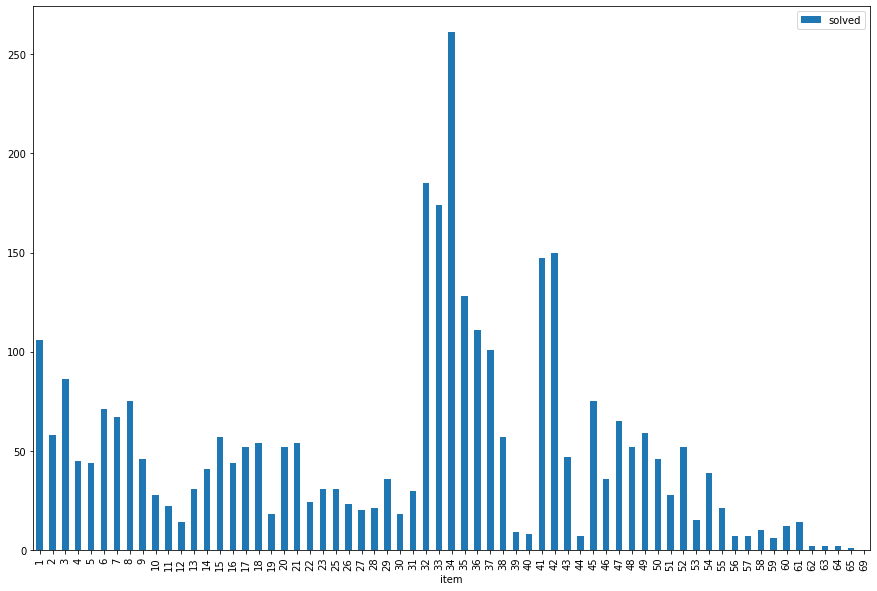

<IPython.core.display.Javascript object>

In [10]:
ip_item_log_frame.groupby("item").sum().reset_index()[["item", "solved"]].plot.bar(
    x="item", y="solved", figsize=(15, 10)
)
plt.show()

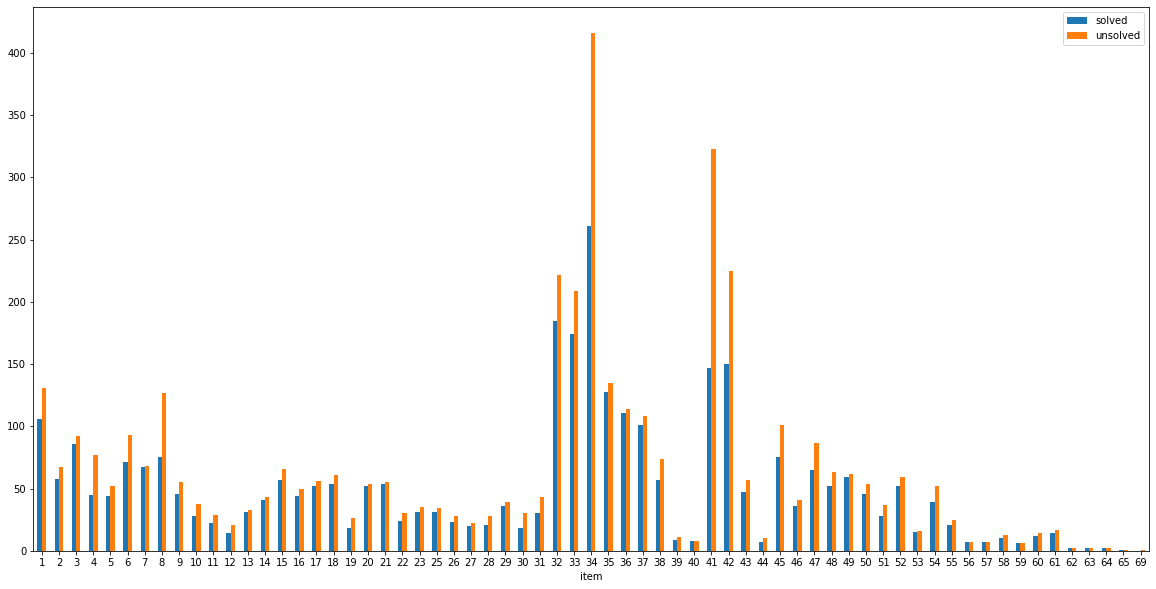

<IPython.core.display.Javascript object>

In [11]:
tmp = ip_item_log_frame[["item", "solved"]].groupby("item").sum()
tmp["unsolved"] = ip_item_log_frame.item.value_counts().sort_index()
tmp.plot.bar(rot=0, figsize=(20, 10))
plt.show()

In [12]:
ip_log_frame.sample(10)

,id,user,item,answer,correct,moves,responseTime,time
9354,17718,3456977,17,ZGVmIGZpdmVfbXVsdGlwbGVzKDUsIDI1LCAzNSk6CiAgIC...,0,-1,95350,2018-12-04 18:46:58
14470,29463,4306827,34,ZGVmIG11bHRpcGxlcyhuKToKICAgIHByaW50KCJEdm9qbm...,1,-1,76000,2019-02-07 08:40:18
19527,38069,4152177,41,ZGVmIG5pY2UoYSwgYik6CmlmIGEgJSAyID09IDA6CiAgIC...,0,-1,217850,2019-05-02 20:00:05
2304,6491,359254,54,ZGVmIGNvbXBhcmUoYSwgYik6CiAgICBwcmludCgiNyBqZS...,0,-1,60700,2018-05-03 08:47:36
42681,63966,791389,35,ZGVmIHNlcXVlbmNlcyhuKToKICAgIGZvciBpIGluIHJhbm...,1,-1,108400,2020-02-19 09:47:07
17795,34846,5067965,50,ZGVmIGNyb3NzKHopOgogICAgcHJpbnQoeiwgIiAiLCB6KQ...,1,-1,116200,2019-04-02 17:51:22
41060,62345,13309857,64,ZGVmIG1hZ2ljX3Rlc3QodGVhcnMsIGhvcm5zLCB0YWlscy...,1,-1,135550,2020-01-30 13:43:49
22177,42058,7752559,51,ZGVmIGJtaShoZWlnaHQsIHdlaWdodCk6CiAgICBpbmRleD...,0,-1,1137150,2019-06-12 12:04:09
25182,46467,11045528,34,ZGVmIG11bHRpcGxlcyhuKToKICAgIG49MipuCiAgICBwcm...,0,-1,114950,2019-09-12 01:38:36
4630,10134,2802162,47,ZGVmIHN1bV9kaWYoYSwgYik6CiAgICBwcmludChhLCIrIi...,1,-1,108650,2018-09-14 10:36:59


<IPython.core.display.Javascript object>

In [13]:
exc = []


def decode_solution(solution):
    try:
        return b64decode(solution).decode("utf-8")
    except Exception as e:
        exc.append(type(e))
        return ""


def decode_ast(solution):
    try:
        ast.parse(solution)
        return True
    except Exception:
        return False

<IPython.core.display.Javascript object>

In [14]:
ip_log_frame["dec_answer"] = ip_log_frame.answer.apply(decode_solution)

<IPython.core.display.Javascript object>

In [15]:
Counter(exc)

Counter({binascii.Error: 1330,
         UnicodeDecodeError: 290,
         ValueError: 8,
         TypeError: 28})

<IPython.core.display.Javascript object>

In [16]:
dec_ans_frame = ip_log_frame[ip_log_frame.dec_answer != ""]

<IPython.core.display.Javascript object>

In [17]:
dec_ans_frame[(dec_ans_frame.item == 42)]

,id,user,item,answer,correct,moves,responseTime,time,dec_answer
462,2132,12,42,ZGVmIGhhcHB5KGEsIGIsIGMpOmJyZWFrICAgIHJldHVybi...,0,-1,14150,2017-12-08 15:04:25,"def happy(a, b, c):break return (a < 3 or b..."
463,2133,12,42,ZGVmIGhhcHB5KGEsIGIsIGMpOmJyZWFrICAgIHJldHVybi...,1,-1,21200,2017-12-08 15:04:32,"def happy(a, b, c):break return (a < 3 or b..."
467,2155,1549050,42,ZGVmIGhhcHB5KGEsIGIsIGMpOmJyZWFrICAgIHJldHVybi...,0,-1,21400,2017-12-08 18:49:40,"def happy(a, b, c):break return Falsebreak"
468,2156,1549050,42,ZGVmIGhhcHB5KGEsIGIsIGMpOmJyZWFrICAgIHJldHVybi...,0,-1,21400,2017-12-08 18:49:40,"def happy(a, b, c):break return Falsebreak"
469,2157,1549050,42,ZGVmIGhhcHB5KGEsIGIsIGMpOmJyZWFrICAgIHJldHVybi...,0,-1,24750,2017-12-08 18:49:44,"def happy(a, b, c):break return Falsebreak"
...,...,...,...,...,...,...,...,...,...
43133,64418,12191073,42,YSA9IDEKYiA9IDIKYyA9IDMKCgpkZWYgaGFwcHkoYSA9ID...,0,-1,282950,2020-02-22 21:17:03,"a = 1\nb = 2\nc = 3\n\n\ndef happy(a = 1, b = ..."
43134,64419,12191073,42,ZGVmIGhhcHB5KGEsIGIsIGMpOgoKaWYgYSA9PSAxOgogIC...,0,-1,376200,2020-02-22 21:41:04,"def happy(a, b, c):\n\nif a == 1:\n print('..."
43137,64422,13636225,42,ZGVmIGhhcHB5KGEsIGIsIGMpOgogICAgaWYgYTwzIG9yIG...,1,-1,103250,2020-02-22 23:45:24,"def happy(a, b, c):\n if a<3 or b<3 or c<3:..."
43485,64770,13771923,42,ZGVmIGhhcHB5KGEsIGIsIGMpOgogICAgaWYgYSA8IDM6Ci...,1,-1,267050,2020-02-29 17:03:41,"def happy(a, b, c):\n if a < 3:\n re..."


<IPython.core.display.Javascript object>

In [18]:
answers_45 = dec_ans_frame[(dec_ans_frame.item == 45)][["dec_answer", "correct"]]

<IPython.core.display.Javascript object>

In [19]:
parsed_45 = answers_45.dec_answer.apply(decode_ast)

<IPython.core.display.Javascript object>

In [20]:
ip_item_frame[ip_item_frame.id == 45]

,id,name,instructions,democode,testcode,solution,tests,medianTime,ordering,visible,created
44,45,Výpisy součtů,"[[""html"",""Napište funkci <b>print_sums(n)</b>,...","[[""python64"",""ZGVmIHByaW50X3N1bXMobik6CiAgICBm...","[[""python64"",""cHJpbnRfc3VtcygxMykgICAgICAgIAo=""]]","[[""python64"",""ZGVmIHByaW50X3N1bXMobik6CiAgICBm...","[[""python64"",""cHJpbnRfc3VtcygxMCkK""],[""python6...",176162,2,1,2017-12-08 15:31:39


<IPython.core.display.Javascript object>

In [21]:
l_solution_45 = eval(ip_item_frame.set_index("id").loc[45].solution)
solution_45 = decode_solution(l_solution_45[0][1])
solution_45

'def print_sums(n):\n    for i in range(1, n):\n        print(n, "=", i, "+", n-i)\n'

<IPython.core.display.Javascript object>

In [22]:
import pycode_similar

<IPython.core.display.Javascript object>

In [23]:
smilarity = pycode_similar.detect(
    [solution_45, *answers_45.dec_answer[parsed_45].values],
)

<IPython.core.display.Javascript object>

In [24]:
sim_perc = np.array([x[1][0].plagiarism_percent for x in smilarity])

<IPython.core.display.Javascript object>

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [26]:
tmp_frame = pd.DataFrame(answers_45[parsed_45])
tmp_frame["sim_perc"] = [x[1][0].plagiarism_percent for x in smilarity]
tmp_frame["code_len"] = tmp_frame.dec_answer.apply(len)

<IPython.core.display.Javascript object>

In [27]:
ast_len = []
for x in smilarity:
    if x[1][0].info_candidate is not None:
        ast_len.append(len(x[1][0].info_candidate.func_ast_lines))
    else:
        ast_len.append(0)
tmp_frame["ast_len"] = ast_len

<IPython.core.display.Javascript object>

In [28]:
tmp_frame

,dec_answer,correct,sim_perc,code_len,ast_len
1113,def print_sums(n):\n for i in range(n):\n ...,0,0.444444,75,5
1114,def print_sums(n):\n for i in range(n):\n ...,0,0.444444,79,5
1115,def print_sums(n):\n for i in range(n):\n ...,0,0.444444,79,5
1142,"def print_sums(n):\n for i in range(1,n):\n...",1,1.000000,81,9
1205,def print_sums(n):\n for i in range(n):\n ...,1,0.777778,139,11
...,...,...,...,...,...
42826,"def print_sums(n):\n for i in range(1,n):\n...",1,1.000000,79,9
43111,def print_sums(n):\n for i in range(n-1):\n...,1,0.888889,85,9
43257,"def print_sums(n):\n for i in range(1, n):\...",1,1.000000,82,9
43260,"def print_sums(n):\n for i in range(1,n):\n...",1,1.000000,79,9


<IPython.core.display.Javascript object>

In [29]:
scaler = StandardScaler()
pca = PCA()

<IPython.core.display.Javascript object>

In [30]:
transformed = pca.fit_transform(
    scaler.fit_transform(tmp_frame[[x for x in tmp_frame.columns if x != "dec_answer"]])
)

<IPython.core.display.Javascript object>

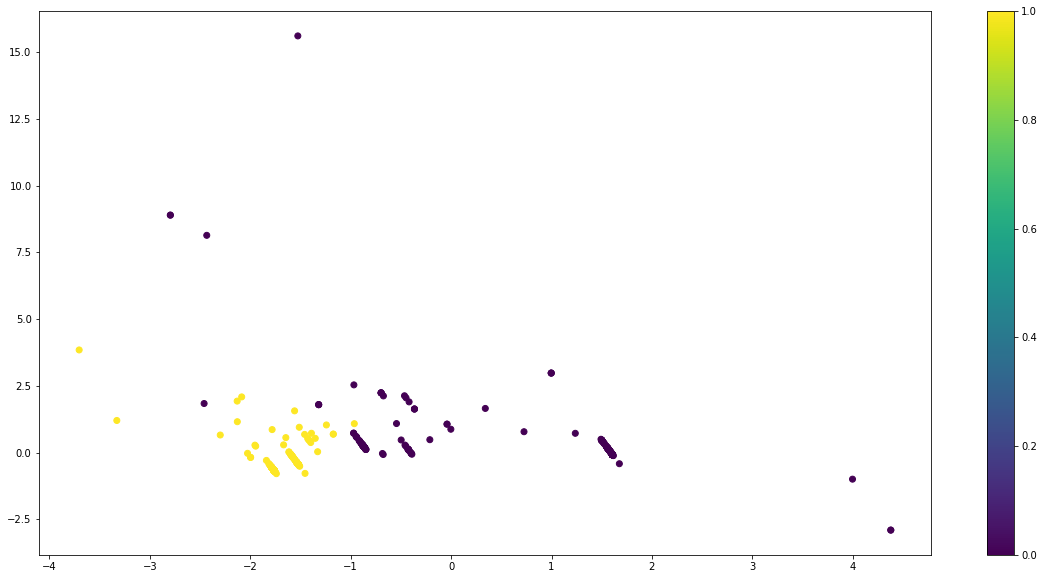

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(20, 10))
plt.scatter(*transformed.T[:2], c=tmp_frame.correct)
plt.colorbar()
plt.show()